In [1]:
from duckduckgo_search import DDGS

birds = []
with DDGS() as ddgs:
    keywords = 'bird photos'
    ddgs_images_gen = ddgs.images(
      keywords,
      region="wt-wt",
      safesearch="off",
      size=None,
      type_image=None,
      layout=None,
      license_image=None,
      max_results=100,
    )
    for r in ddgs_images_gen:
        birds.append(r)

In [2]:
birds[2]

{'title': 'Mountain bluebird today in central Colorado. First time seeing one! : r ...',
 'image': 'https://i.redd.it/n1e0kjh3nwu21.jpg',
 'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.n7C7as_7kjc9IChg_LpYeAHaF7&pid=Api',
 'url': 'https://www.reddit.com/r/wildlifephotography/comments/bi5wgs/mountain_bluebird_today_in_central_colorado_first/',
 'height': 2266,
 'width': 2832,
 'source': 'Bing'}

In [3]:
urls = [bird['image'] for bird in birds][:10]
urls

['https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg',
 'https://images.alphacoders.com/492/492674.jpg',
 'https://i.redd.it/n1e0kjh3nwu21.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/6/67/Mockingbird,_Northern_SunsetBeach.jpg',
 'https://i2.wp.com/earthnworld.com/wp-content/uploads/2015/11/Blue-Jay.jpg?ssl=1',
 'http://www.voidphase.com/media/2010/12/bird_gouldian_finch_1920.jpg',
 'http://hdqwalls.com/download/1/colorful-parrot-bird.jpg',
 'https://static.pexels.com/photos/97533/pexels-photo-97533.jpeg',
 'http://upload.wikimedia.org/wikipedia/commons/9/9b/Eastern_Bluebird-27527-2.jpg',
 'https://www.almanac.com/sites/default/files/image_nodes/bluebird-3456115_1920.jpg']

In [4]:
# Putting the above together:
def search_images(search_term, item="image", max_results=100):
    """
    item can be "image" (full-size image URL), "thumbnail", or "url" (page where found) 
    """
    results = []
    with DDGS() as ddgs:
        ddgs_images_gen = ddgs.images(
          keywords=search_term,
          region="wt-wt",
          safesearch="off",
          size=None,
          type_image=None,
          layout=None,
          license_image=None,
          max_results=max_results,
        )
        for r in ddgs_images_gen:
            results.append(r)
    return [r[item] for r in results]

search_images("bird photos", item="thumbnail", max_results=10)
thumbs = search_images("bird photos", item="thumbnail", max_results=5)
thumbs

['https://tse3.mm.bing.net/th?id=OIP.Ct8gRWSHnCcLr7ozTKmePAHaIp&pid=Api',
 'https://tse4.mm.bing.net/th?id=OIP.sleWxJRjQLAghcYqhDlEcQHaEo&pid=Api',
 'https://tse4.mm.bing.net/th?id=OIP.n7C7as_7kjc9IChg_LpYeAHaF7&pid=Api',
 'https://tse4.mm.bing.net/th?id=OIP.BUS5Tp58f4TJ_UVDtI4wQwHaFj&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.eRAcekSLvo8DBMzKOL4apQHaIL&pid=Api']

In [8]:
from fastai.vision.all import *
desttest = Path("./files/test")

In [67]:
# Replacing download_url. Test #1:
"""
import requests
url = birds[3]['thumbnail']
response = requests.get(url)
if response.status_code == 200:
    with open("./files/birds/birds_3_thumbnail.jpg", 'wb') as f:
        f.write(response.content)
"""
def new_download_images(dest, urls, file_naming=None):
    """
    @file_naming: function to convert url into a destination filename. By default: file_<idx>.jpg.
    """
    if file_naming is None:
        def file_naming(i, e):
            return f'file_{i}.jpg'
    for idx, url in enumerate(urls):
        filename = file_naming(idx, url)
        # print(url)
        # print(dest/filename)
        # continue
        response = requests.get(url)
        if response.status_code == 200:
            with open(dest/filename, 'wb') as f:
                f.write(response.content)
new_download_images(desttest, thumbs, file_naming=lambda i, e: f'hi_{i}.jpg')

```
from fastdownload import download_url
dest = 'bird.jpg'
for i, url in enumerate(urls):
    try:
        download_url(url, ".files/birds/bird_{}.jpg".format(i), show_progress=False)
        print("success?")
    except Exception as e:
        print(e)

<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>
...
```

Have to rewrite this code to do the same thing:
```
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
```

In [11]:
searches = 'forest','bird'
path = Path('files/bird_or_not')

In [5]:
from time import sleep
for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    new_download_images(dest, urls=search_images(f'{o} photo', item="thumbnail", max_results=5), 
                        file_naming=lambda i, e: f'img_{i}.jpg')
    sleep(10)
    new_download_images(dest, urls=search_images(f'{o} sun photo', item="thumbnail", max_results=5),
                        file_naming=lambda i, e: f'sun_{i}.jpg')
    sleep(10)
    new_download_images(dest, urls=search_images(f'{o} shade photo', item="thumbnail", max_results=5),
                        file_naming=lambda i, e: f'shade_{i}.jpg')


NameError: name 'Path' is not defined

In [70]:
resize_images(path/o, max_size=400, dest=path/"bird")

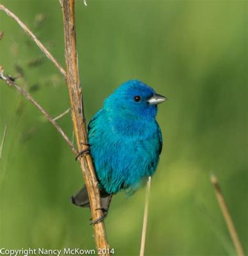

In [9]:
from fastai.vision.all import *
Image
im = Image.open("./files/bird_or_not/bird/shade_2.jpg")
im.to_thumb(256,256)

In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

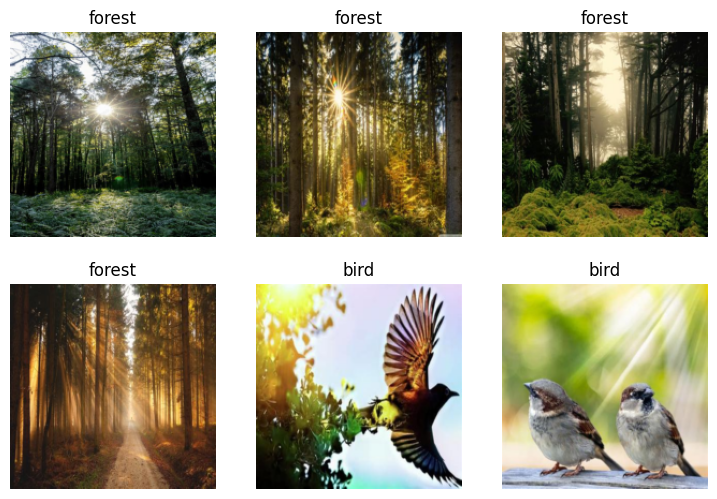

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/arthur/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:03<00:00, 13.8MB/s]


In [26]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.117121,1.015180,0.750000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.463739,0.828820,0.500000,00:01
1,1.039714,0.269152,0.125000,00:00
2,0.702282,0.162263,0.125000,00:00


In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context